# Sarim Faheem

## Research question/interests

How likely is it for a certain matchday (gameweek) or time to be a predictor of a rowdy crowd? 

We wanted to look at how psycological influences affect fan/spectator behavior during NFL games. One such influence is 'groupthink' where individuals may behave disorderly if they see the larger group behave as such. Using matchday time and week data can correlate late games or holiday/vacational/weekend games with a rowdier crowd and in turn prove our hypothesis.

In [22]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

rawarrest = pd.read_csv("..\\data\\raw\\arrests.csv", sep= ",")
rawarrest

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y


## Milestone 3
---
#### An Exploratory Data Analysis (EDA) on your dataset

Let's start with a quick output of the dataframe head and tail to get an idea of what the data looks like (first/last 5 lines)

In [23]:
rawarrest.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [24]:
rawarrest.tail()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y
1005,2015,15,Sunday,1:00:00 PM,Washington,Buffalo,35,25,NaN,1.0,n


Get the columns of the raw data and the number of columns to see how extensive the list is

In [25]:
rawDfColumns = list(rawarrest.columns)
print(f"Columns: {rawDfColumns}")
print(f"Column count: {len(rawDfColumns)}")

Columns: ['season', 'week_num', 'day_of_week', 'gametime_local', 'home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'arrests', 'division_game']
Column count: 11


The following datasets on NFL arrrests has 11 columns that consists of the following categories:
1. Season = The year of the corresponding season from which data entry was recorded.
2. Week Number = The week or gameday week during which the fixture for data entry took place.
3. Day of week = The day of the week when the game of data entry took place. 
4. Gametime Local = Local timezone reflected time for scheduled game.
5. Home team = Corresponding home team from matchday.
6. Away team = Corresponding away team from matchday.
7. Home score = Corresponding home score for matchday.
8. Away score = Corresponding away score for matchday.
9. OT Flag = Data variable to confirm if the game went into overtime for corresponding data entry.
10. Arrests = Number of arrests recorded during matchday. 
11. Division game = Data variable to confirm if the game was an inter-divisional game (higher signficance/rivalry).

For this corresponding research question, the data aims to address the influence of time and data in relation to arrests made in stadium. To do this the data needs to be reformatted to include only the following variables:

- Season (For referencing)
- Week Number
- Day of Week
- Gametime local
- Arrests

But first let's obtain some more info about the values within our data.

In [26]:
rawarrest.describe()

,season,week_num,home_score,away_score,arrests
count,1006.000000,1006.000000,1006.000000,1006.000000,966.000000
mean,2013.000000,9.116302,23.934394,21.115308,6.566253
std,1.406453,5.008986,10.442626,9.734006,9.512101
min,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,5.000000,17.000000,14.000000,1.000000
50%,2013.000000,9.000000,23.000000,20.000000,3.000000
75%,2014.000000,14.000000,30.000000,27.000000,8.000000
max,2015.000000,17.000000,59.000000,56.000000,69.000000


We can now see totals for the categorical variables within the dataset.

Of note here is that the max value for arrests in a game was 69! 
Let's also do a quick check of what unique variables are present in some of the notable categories.

In [27]:
rawarrest.season.unique() #Season

array([2011, 2012, 2013, 2014, 2015], dtype=int64)

In [28]:
rawarrest.arrests.unique() #Arrests

array([ 5.,  6.,  9.,  3.,  4.,  1.,  0., 12.,  7.,  2., 10.,  8., 15.,
       13., 11., nan, 21., 18., 16., 14., 19., 23., 26., 35., 31., 39.,
       20., 29., 46., 22., 24., 33., 28., 34., 30., 38., 17., 27., 25.,
       44., 32., 49., 52., 37., 56., 69., 41., 47., 45., 40., 60., 36.])

The following array showcases that at one point there were no arrests within the dataset. An important factor to recall when building our analysis.

In [29]:
rawarrest.home_score.unique()

array([28, 27, 20, 19, 21, 23, 24,  3, 17, 38, 13, 25, 22, 40, 30, 18, 31,
       14,  6, 47, 26, 34, 35, 29, 16,  7, 33, 48, 12,  9, 10, 37, 39, 41,
       45, 15,  8, 49, 42, 36, 44, 52, 51, 32, 46, 55, 53, 43,  2, 59,  0,
       54, 58, 11], dtype=int64)

In [30]:
rawarrest.away_score.unique()

array([21, 31, 32, 13, 19, 17, 20, 16,  6, 24, 10, 28, 34, 11, 23, 14, 35,
        7, 18,  8, 36, 27,  3, 26, 41, 12, 33, 22, 30,  0, 15, 37, 29, 38,
        9, 42, 51, 39, 45, 25, 44, 40, 49, 43, 56, 48], dtype=int64)

Everything looks good for the scores! There are integer values present and include data variables for 0 pt games etc.

In [31]:
rawarrest.day_of_week.unique()

array(['Sunday', 'Monday', 'Thursday', 'Saturday', 'Wednesday'],
      dtype=object)

In [32]:
rawarrest.OT_flag.unique()

array([nan, 'OT'], dtype=object)

The authors seemed to define overtime games as variables of 'OT' representing an overtime game or 'NaN' representing a game concluding within the regular interval. Another important detail to note is that the weeks only correspond to 5 days and exclude Fridays and Tuesdays. This is due to Sports Broadcasting Act of 1961 which attributes highschool and college football games to Fridays and rarely Saturdays respectively and does not permit the scheduling of any NFL games on these days unless required and not causing scheduling conflict. Tuesday games are

The last category to check is local time to understand the output for when/if we need to potentially convert a datetime object.

In [33]:
rawarrest.gametime_local.unique()

array(['1:15:00 PM', '1:05:00 PM', '2:15:00 PM', '2:05:00 PM',
       '1:25:00 PM', '5:30:00 PM', '2:25:00 PM', '5:25:00 PM',
       '7:20:00 PM', '6:30:00 PM', '8:20:00 PM', '4:05:00 PM',
       '1:00:00 PM', '8:30:00 PM', '4:25:00 PM', '8:25:00 PM',
       '1:02:00 PM', '8:40:00 PM', '12:00:00 PM', '3:25:00 PM',
       '3:15:00 PM', '7:30:00 PM', '7:25:00 PM', '7:40:00 PM',
       '1:03:00 PM', '4:16:00 PM', '3:30:00 PM', '8:15:00 PM',
       '6:20:00 PM', '6:40:00 PM', '6:25:00 PM', '12:30:00 PM',
       '7:10:00 PM', '3:05:00 PM', '4:15:00 PM', '7:15:00 PM',
       '5:20:00 PM', '8:35:00 PM', '5:40:00 PM', '1:06:00 PM',
       '5:41:00 PM', '1:26:00 PM', '5:31:00 PM', '5:42:00 PM',
       '1:27:00 PM', '4:30:00 PM'], dtype=object)

---
Everything looks good here with an HH:MM:SS format!

- Overall, the raw dataset is already well formatted but clearly needs reformatting to accomodate our analytical goals. The dataset needs better formatting for column names. 
- The sorting method can also be cleaned up by having the data sorted by season and descending order of day of the week.
  
Now let's explore some of our data and see what trends we may expect.
Let's look at the first 100 datapoints and see what our average arrest data is like:

[Text(0.5, 1.0, 'Average number of arrest during the week for first 100 datapoints'),
 Text(0, 0.5, 'Arrests'),
 Text(0.5, 0, 'Day of the week')]

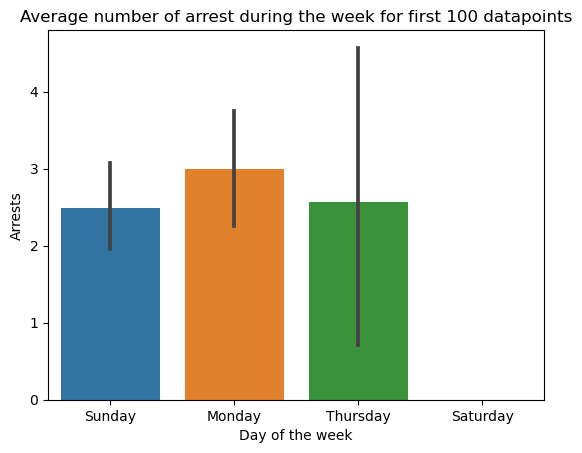

In [34]:
rawheaddf = rawarrest.head(100)
sns.barplot(x='day_of_week', y = 'arrests', data=rawheaddf).set(title='Average number of arrest during the week for first 100 datapoints',ylabel='Arrests', xlabel='Day of the week')

The data for the first chunk of datapoints is evidently sorted on based days of the week and requires reformatting of sorting to account for Saturday in a finalized analysis.
    
Now let's observe a sample of (50) data points and see histogram analysis for total arrests during game/matchday weeks.

<AxesSubplot:>

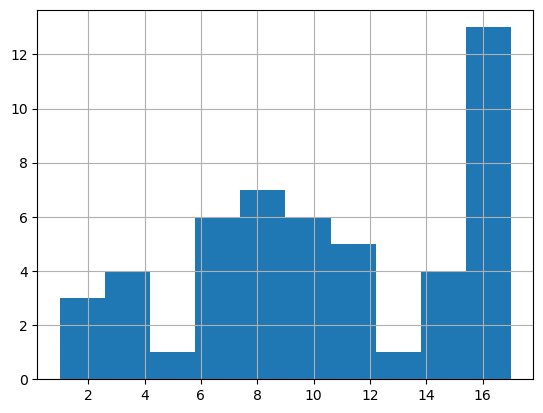

In [35]:
rawsampledf= rawarrest.sample(50)
weektest = rawsampledf['week_num']
weektest.hist()

This sample from the dataset shows lots of variation with lower arrests within the 4-5 and 11-12 matchday/weeks.
    
What about overall arrests? What if we observe the higher end of arrests (40+arrests) within the dataframe only.

In [36]:
arrestsmax = rawarrest[rawarrest['arrests'].gt(40)]
arrestsmax

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
591,2013,12,Sunday,4:25:00 PM,New York Giants,Dallas,21,24,NaN,46.0,y
646,2015,10,Thursday,8:25:00 PM,New York Jets,Buffalo,17,22,NaN,44.0,y
677,2014,14,Sunday,1:25:00 PM,Oakland,San Francisco,24,13,NaN,49.0,n
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
772,2011,12,Sunday,1:15:00 PM,San Diego,Denver,13,16,OT,41.0,y
776,2012,3,Sunday,1:05:00 PM,San Diego,Atlanta,3,27,NaN,47.0,n
777,2012,6,Monday,5:30:00 PM,San Diego,Denver,24,35,NaN,45.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


Interestingly enough, there seems to be a some correlation here at first glance between home teams and higher arrests. 

**BUT** we are looking time and days for this set where there also seems to be higher arrests on NFL Sunday.
  
One more thing I also want to view is the overall histogram data for **ALL** our variables and see what we are working with.

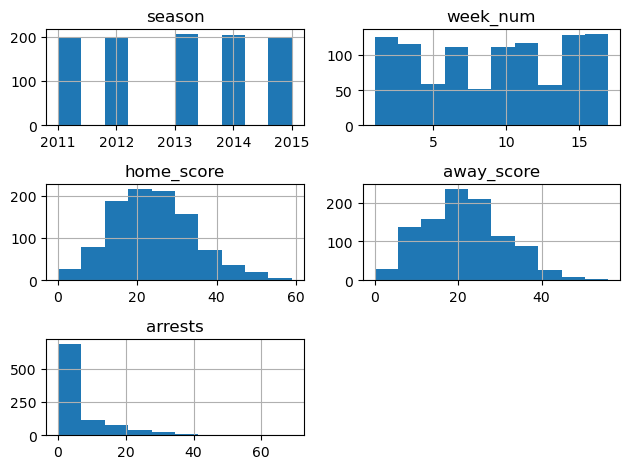

In [37]:
rawarrest.hist()
plt.tight_layout() #Avoid Title overlap

Arrests numbers remain consistent across the years and when looking at the trends on the arrest histogram, the data showcases that 0 arrests is the most common value for NFL games *(Phew!)*
    
Time to clean up or dataframe and since this analysis is looking particularly at the influence of time/day for locale and overall setting, we also need to keep only the essential categorical variables in our cleaned up dataset.

---
#### Set up an 'Analysis Pipeline'

Let's load in the original arrests dataset again and keep only the columns we need to analyze our specific metric of groupthink.

Then we can sort the rows based on year/season and the corresponding day of the week. Additionally I also want to rename the columns appropriately for columns.

Once we complete this we can now save the data and implement it into a new dataframe in a processed output file.

In [38]:
#loading dataset
rawarrest = pd.read_csv("..\\data\\raw\\arrests.csv", sep= ",")
    
#Removing columns
formatdf = rawarrest.copy().drop(columns=['home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'division_game'],axis=1).dropna(axis=0)

#Sorting
formatdf.sort_values(by=['season', 'day_of_week'],inplace=True)
    
#Rename columns
formatdf.rename(columns={'day_of_week':'Day of Week','week_num':'Week Number','gametime_local': 'Gametime Local', 
                        'arrests':'Arrests', 'season':'Season'},inplace = True)

#Save the data in = processed output file
formatdf.to_csv('..\\data\\processed\\SFaheemAnalysisProcess.csv',index=False)

#Now let's quickly observe what our new data looks like
formatdf.head(10)

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0
428,2011,13,Monday,8:30:00 PM,6.0
462,2011,8,Monday,7:30:00 PM,2.0
534,2011,11,Monday,8:30:00 PM,12.0
570,2011,2,Monday,8:30:00 PM,18.0
612,2011,6,Monday,8:30:00 PM,28.0
690,2011,9,Monday,8:30:00 PM,2.0


---
#### Method Chaining and writing Python programs

In [39]:
from project_functions3.py import project_functions3 as p3
    
projectDf = p3.load_and_process('..\\data\\raw\\dataRaw.csv')
projectDf.head()

ModuleNotFoundError: No module named 'project_functions3'